In [1]:
import pprint as pp

# BACKEND API

## Client Setup

In [2]:
from magic_data_server.client_api import MagicClientAPI
client=MagicClientAPI(host='0.0.0.0',port=5001,protocol='http')

In [3]:
client.test_connection()

request http://0.0.0.0:5001/api/v1.0/magic/test-connection None
<Response [200]>


['connection OK']

In [4]:
client.get_paper_ids()

request http://0.0.0.0:5001/api/v1.0/magic/paper_ids None
<Response [200]>


['2019c_M15', '2019e', 'data', 'old']

## Accessing products

In [5]:
files_dict=client.search_by_name('M15',get_products=True)

request http://0.0.0.0:5001/api/v1.0/magic/search-by-name {'target_name': 'M15', 'paper_id': None, 'get_products': True}
<Response [200]>
p -> prod_id_0


In [6]:
files_dict

{'src_name': 'M15',
 'src_aliases': ['4U2127+119; AXS_J212957+1209; SAXWFCJ2130.0+1209.7; 2127+119; CXOJ212958.1+121002; 1RXSJ212958.4+120959; 4U2129+12; 1WGAJ2129.9+1210; PSRB2127+11; 1ES2127+119; PBCJ2129.9+1210'],
 'MWL_files': {},
 'MAGIC_files': {'prod_id_0': {'src_name': 'M15',
   'src_aliases': '4U2127+119; AXS_J212957+1209; SAXWFCJ2130.0+1209.7; 2127+119; CXOJ212958.1+121002; 1RXSJ212958.4+120959; 4U2129+12; 1WGAJ2129.9+1210; PSRB2127+11; 1ES2127+119; PBCJ2129.9+1210',
   'file': 'magic_2019c_fig3_sed.ecsv',
   'paper_id': '2019c_M15',
   'astropy_table': <Table length=13>
   srcname    en     en_wlo   en_wup  ...  texpo  instrument dataformat comments
    latex    GeV      GeV      GeV    ...    h      latex      latex     latex  
     str3  float32  float32  float32  ... float32    str5       str2      str1  
   ------- -------- -------- -------- ... ------- ---------- ---------- --------
       M15 59.44692 47.22056 74.83894 ...   173.0      MAGIC         ul       --
       

In [7]:
files_dict['MAGIC_files']['prod_id_0']['astropy_table'].meta

OrderedDict([('Filename', 'magic_2019c_fig3_sed.ecsv'),
             ('Source', 'M15'),
             ('Figure',
              'Figure 3 in the paper. Broadband SED data. Only upper limits.'),
             ('Title',
              'Deep observations of the globular cluster M15 with the MAGIC telescopes'),
             ('Comments', 'Only upper limits')])

In [8]:
files_dict.keys()

dict_keys(['src_name', 'src_aliases', 'MWL_files', 'MAGIC_files'])

In [9]:
p_ids=client.get_paper_ids()


request http://0.0.0.0:5001/api/v1.0/magic/paper_ids None
<Response [200]>


In [10]:
print(p_ids)

['2019c_M15', '2019e', 'data', 'old']


In [11]:
catalog=client.get_catalog(paper_id='2019e')


request http://0.0.0.0:5001/api/v1.0/magic/catalog {'paper_id': '2019e'}
<Response [200]>


In [12]:
pp.pprint(catalog[0])

{'File list MAGIC': ['magic_2019e_sed_fig1.ecsv'],
 'File_info': 'Fdate = 20191125 Fvers = 1 Fgen = Elisa Prandini, '
              'elisa.prandini@unipd.it Fmail = contact.magic@mpp.mpg.de Flink '
              "= <link_to_thisfile_repository> Fstatus = 'In completion, some "
              "paper info to be updated after publication'",
 'Paper info': {'Pads': '2019arXiv191106680M',
                'Parxiv': 'http://arxiv.org/abs/arXiv:1911.06680',
                'Pcauthor': 'Elisa Prandini, Cornelia Arcaro, Vandad Fallah '
                            'Ramazani',
                'Pcoll': 'magic',
                'Pdoi': 'https:// doi.org/XXX',
                'Pfauthor': 'Acciari V.A., Ansoldi S., Antonelli L.A., Engels '
                            'A.A., Asano K., Baack D., Babic A., Banerjee B., '
                            'Barres de Almeida U., Barrio J.A., Becerra '
                            'Gonzalez J., Bednarek W., Bellizzi L., Bernardini '
                            'E.,

In [13]:
targets_dict=client.get_targets(paper_id='2019c_M15')
pp.pprint(targets_dict)

request http://0.0.0.0:5001/api/v1.0/magic/targets {'paper_id': '2019c_M15'}
<Response [200]>
{'src_00': ['M15',
            '4U2127+119',
            ' AXS_J212957+1209',
            ' SAXWFCJ2130.0+1209.7',
            ' 2127+119',
            ' CXOJ212958.1+121002',
            ' 1RXSJ212958.4+120959',
            ' 4U2129+12',
            ' 1WGAJ2129.9+1210',
            ' PSRB2127+11',
            ' 1ES2127+119',
            ' PBCJ2129.9+1210']}


In [14]:
targets_dict

{'src_00': ['M15',
  '4U2127+119',
  ' AXS_J212957+1209',
  ' SAXWFCJ2130.0+1209.7',
  ' 2127+119',
  ' CXOJ212958.1+121002',
  ' 1RXSJ212958.4+120959',
  ' 4U2129+12',
  ' 1WGAJ2129.9+1210',
  ' PSRB2127+11',
  ' 1ES2127+119',
  ' PBCJ2129.9+1210']}

In [15]:
 files_dict=client.search_by_name('M15',paper_id='2019c_M15')


request http://0.0.0.0:5001/api/v1.0/magic/search-by-name {'target_name': 'M15', 'paper_id': '2019c_M15', 'get_products': False}
<Response [200]>


In [16]:
files_dict

{'src_name': 'M15',
 'src_aliases': ['4U2127+119; AXS_J212957+1209; SAXWFCJ2130.0+1209.7; 2127+119; CXOJ212958.1+121002; 1RXSJ212958.4+120959; 4U2129+12; 1WGAJ2129.9+1210; PSRB2127+11; 1ES2127+119; PBCJ2129.9+1210'],
 'MWL_files': {},
 'MAGIC_files': {'prod_id_0': {'src_name': 'M15',
   'src_aliases': '4U2127+119; AXS_J212957+1209; SAXWFCJ2130.0+1209.7; 2127+119; CXOJ212958.1+121002; 1RXSJ212958.4+120959; 4U2129+12; 1WGAJ2129.9+1210; PSRB2127+11; 1ES2127+119; PBCJ2129.9+1210',
   'file': 'magic_2019c_fig3_sed.ecsv',
   'paper_id': '2019c_M15',
   'astropy_table': {'binary': None,
    'ascii': '# %ECSV 0.9\n# ---\n# datatype:\n# - {name: srcname, unit: latex, datatype: string, description: Source name}\n# - {name: en, unit: GeV, datatype: float32, description: Energy}\n# - {name: en_wlo, unit: GeV, datatype: float32, description: Energy bin width low}\n# - {name: en_wup, unit: GeV, datatype: float32, description: Energy bin width up}\n# - {name: nufnu, unit: erg / (cm2 s), datatype: flo

In [17]:
sed_table=client.get_table_data(file_name='magic_2019c_fig3_sed.ecsv',paper_id='2019c_M15')

request http://0.0.0.0:5001/api/v1.0/magic/get-table {'file_name': 'magic_2019c_fig3_sed.ecsv', 'paper_id': '2019c_M15'}
<Response [200]>


In [18]:
sed_table

srcname,en,en_wlo,en_wup,nufnu,nufnu_elo,nufnu_eup,tstart,tstop,texpo,instrument,dataformat,comments
latex,GeV,GeV,GeV,erg / (cm2 s),erg / (cm2 s),erg / (cm2 s),mjd,mjd,h,latex,latex,latex
str3,float32,float32,float32,float32,float32,float32,float32,float32,float32,str5,str2,str1
M15,59.44692,47.22056,74.83894,2.8759e-11,nan,nan,57174.0,57632.0,173.0,MAGIC,ul,--
M15,94.21626,74.83894,118.6108,6.2414e-12,nan,nan,57174.0,57632.0,173.0,MAGIC,ul,--
M15,149.3215,118.6108,187.9839,1.3773e-12,nan,nan,57174.0,57632.0,173.0,MAGIC,ul,--
M15,236.6567,187.9839,297.932,4.8347e-13,nan,nan,57174.0,57632.0,173.0,MAGIC,ul,--
M15,375.0726,297.932,472.1865,6.1422e-13,nan,nan,57174.0,57632.0,173.0,MAGIC,ul,--
M15,594.4452,472.1865,748.3591,1.7449e-13,nan,nan,57174.0,57632.0,173.0,MAGIC,ul,--
M15,942.1245,748.3591,1186.06,1.6071e-13,nan,nan,57174.0,57632.0,173.0,MAGIC,ul,--
M15,1493.155,1186.06,1879.763,3.0143e-13,nan,nan,57174.0,57632.0,173.0,MAGIC,ul,--


In [19]:
sed_table.meta

OrderedDict([('Filename', 'magic_2019c_fig3_sed.ecsv'),
             ('Source', 'M15'),
             ('Figure',
              'Figure 3 in the paper. Broadband SED data. Only upper limits.'),
             ('Title',
              'Deep observations of the globular cluster M15 with the MAGIC telescopes'),
             ('Comments', 'Only upper limits')])

In [20]:
sed_table['nufnu'].to('GeV/(cm2 s)')

<Quantity [1.79499562e-08, 3.89557542e-09, 8.59642968e-10, 3.01758202e-10,
           3.83365950e-10, 1.08908084e-10, 1.00307290e-10, 1.88137797e-10,
           1.73794812e-10, 2.21386312e-10, 1.12540650e-10, 1.36177236e-10,
           2.53948279e-10] GeV / (cm2 s)>

In [21]:
from magic_data_server.plot_tools import DataPlot

In [22]:
sed_table['dataformat']=='ul'

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

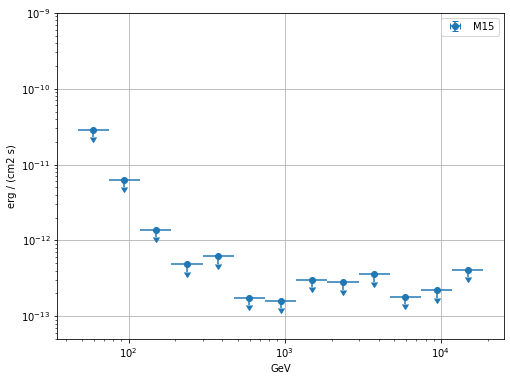

In [23]:
%matplotlib inline

sed_plot=DataPlot()
sed_plot.add_sed(sed_table)
sed_plot.ax.set_ylim(5E-14,1E-9)
sed_plot.ax.grid()

In [24]:
sed_table=client.get_table_data(file_name='magic_2019e_sed_fig1.ecsv',paper_id='2019e')

request http://0.0.0.0:5001/api/v1.0/magic/get-table {'file_name': 'magic_2019e_sed_fig1.ecsv', 'paper_id': '2019e'}
<Response [200]>


In [25]:
sed_table

srcname,en,en_wlo,en_wup,nufnu,nufnu_elo,nufnu_eup,tstart,tstop,texpo,instrument,dataformat,comments
latex,GeV,GeV,GeV,erg / (cm2 s),erg / (cm2 s),erg / (cm2 s),mjd,mjd,h,latex,latex,latex
str11,float32,float32,float32,float32,float32,float32,float32,float32,float32,str5,str3,str1
TXS0210+515,598.132,0.0,0.0,8.89748e-13,3.78e-13,3.7871e-13,57370.0,58042.0,28.6,MAGIC,nan,--
TXS0210+515,1502.44,0.0,0.0,1.40498e-13,5.23e-14,5.23943e-14,57370.0,58042.0,28.6,MAGIC,nan,--
TXS0210+515,3773.96,0.0,0.0,2.43844e-14,9.36e-15,9.36573e-15,57370.0,58042.0,28.6,MAGIC,nan,--


# ODA API 

In [31]:
from oda_api.api import DispatcherAPI
from oda_api.plot_tools import OdaImage,OdaLightCurve
from oda_api.data_products import BinaryData
import os

In [32]:
disp=DispatcherAPI(host='0.0.0.0',port=5000,instrument='mock',protocol='http')


In [33]:
disp.get_instruments_list()

['magic']

In [34]:
disp.get_instrument_description('magic')


--------------
instrumet: magic

--------------
query_name: src_query
 name: src_name,  value: test,  units: str, 
 name: RA,  value: 0.0,  units: deg, 
 name: DEC,  value: 0.0,  units: deg, 
 name: T1,  value: 2001-12-11T00:00:00.000,  units: None, 
 name: T2,  value: 2001-12-11T00:00:00.000,  units: None, 

--------------
query_name: magic_parameters
 name: user_catalog,  value: None,  units: str, 
 name: None,  value: [],  units: names_list, 
 name: selected_catalog,  value: None,  units: str, 

--------------
query_name: magic_table_query
 product_name: magic_table


In [35]:
disp.get_product_description(instrument='magic',product_name='magic_table')

--------------
parameters for  product magic_table and instrument magic

--------------
instrumet: magic

--------------
query_name: src_query
 name: src_name,  value: test,  units: str, 
 name: RA,  value: 0.0,  units: deg, 
 name: DEC,  value: 0.0,  units: deg, 
 name: T1,  value: 2001-12-11T00:00:00.000,  units: None, 
 name: T2,  value: 2001-12-11T00:00:00.000,  units: None, 

--------------
query_name: magic_parameters
 name: user_catalog,  value: None,  units: str, 
 name: None,  value: [],  units: names_list, 
 name: selected_catalog,  value: None,  units: str, 

--------------
query_name: magic_table_query
 product_name: magic_table


In [36]:
data=disp.get_product(instrument='magic',
                      product='magic_table',
                      src_name='M15',
                      dry_run=False)

- waiting for remote response, please wait run_analysis http://0.0.0.0:5000
src_name M15
instrument magic
product_type magic_table
query_type Real
off_line (False,)
query_status ('new',)
verbose (False,)
session_id PO3D4S6CDO8PTRXC
dry_run (False,)
api True
oda_api_version 1.0.1


query done succesfully!


In [37]:
data.show()

ID=0 prod_name=magic_table_0  meta_data: OrderedDict([('Filename', 'magic_2019c_fig3_sed.ecsv'), ('Source', 'M15'), ('Figure', 'Figure 3 in the paper. Broadband SED data. Only upper limits.'), ('Title', 'Deep observations of the globular cluster M15 with the MAGIC telescopes'), ('Comments', 'Only upper limits'), ('paper_id', '2019c_M15')])



In [38]:
data.magic_table_0

srcname,en,en_wlo,en_wup,nufnu,nufnu_elo,nufnu_eup,tstart,tstop,texpo,instrument,dataformat,comments
latex,GeV,GeV,GeV,erg / (cm2 s),erg / (cm2 s),erg / (cm2 s),mjd,mjd,h,latex,latex,latex
str3,float32,float32,float32,float32,float32,float32,float32,float32,float32,str5,str2,str1
M15,59.44692,47.22056,74.83894,2.8759e-11,nan,nan,57174.0,57632.0,173.0,MAGIC,ul,--
M15,94.21626,74.83894,118.6108,6.2414e-12,nan,nan,57174.0,57632.0,173.0,MAGIC,ul,--
M15,149.3215,118.6108,187.9839,1.3773e-12,nan,nan,57174.0,57632.0,173.0,MAGIC,ul,--
M15,236.6567,187.9839,297.932,4.8347e-13,nan,nan,57174.0,57632.0,173.0,MAGIC,ul,--
M15,375.0726,297.932,472.1865,6.1422e-13,nan,nan,57174.0,57632.0,173.0,MAGIC,ul,--
M15,594.4452,472.1865,748.3591,1.7449e-13,nan,nan,57174.0,57632.0,173.0,MAGIC,ul,--
M15,942.1245,748.3591,1186.06,1.6071e-13,nan,nan,57174.0,57632.0,173.0,MAGIC,ul,--
M15,1493.155,1186.06,1879.763,3.0143e-13,nan,nan,57174.0,57632.0,173.0,MAGIC,ul,--


# Error communication 

The cells below show how error communication works.

In [39]:
#missing file error communication

lc_table=client.get_table_data(file_name='magic_19e_lc1_fig2_targetX.ecsv',paper_id='2019e')

request http://0.0.0.0:5001/api/v1.0/magic/get-table {'file_name': 'magic_19e_lc1_fig2_targetX.ecsv', 'paper_id': '2019e'}
<Response [410]>


SystemExit: RemoteException (line 40): error on remote server: table file is empty/corrupted or missing: [Errno 2] No such file or directory: 'MAGIC_data/data/2019e/magic_19e_lc1_fig2_targetX.ecsv'

In [40]:
#worngly formatted file error communication

sed_table=client.get_table_data(file_name='magic_2019c_fig3_sed_test_wrong_format.ecsv',paper_id='2019c_M15')

request http://0.0.0.0:5001/api/v1.0/magic/get-table {'file_name': 'magic_2019c_fig3_sed_test_wrong_format.ecsv', 'paper_id': '2019c_M15'}
<Response [410]>


SystemExit: RemoteException (line 40): error on remote server: table file is empty/corrupted or missing: 
ERROR: Unable to guess table format with the guesses listed below:
Reader:Ecsv delimiter: ';' fast_reader: {'enable': True} fill_values: [('', '0')] strict_names: True
Reader:FixedWidthTwoLine delimiter: ';' fast_reader: {'enable': True} fill_values: [('', '0')] strict_names: True
Reader:RST delimiter: ';' fast_reader: {'enable': True} fill_values: [('', '0')] strict_names: True
Reader:FastBasic delimiter: ';' fast_reader: {'enable': True} fill_values: [('', '0')] strict_names: True
Reader:Basic delimiter: ';' fast_reader: {'enable': True} fill_values: [('', '0')] strict_names: True
Reader:FastRdb delimiter: ';' fast_reader: {'enable': True} fill_values: [('', '0')] strict_names: True
Reader:Rdb delimiter: ';' fast_reader: {'enable': True} fill_values: [('', '0')] strict_names: True
Reader:FastTab delimiter: ';' fast_reader: {'enable': True} fill_values: [('', '0')] strict_names: True
Reader:Tab delimiter: ';' fast_reader: {'enable': True} fill_values: [('', '0')] strict_names: True
Reader:Cds delimiter: ';' fast_reader: {'enable': True} fill_values: [('', '0')] strict_names: True
Reader:Daophot delimiter: ';' fast_reader: {'enable': True} fill_values: [('', '0')] strict_names: True
Reader:SExtractor delimiter: ';' fast_reader: {'enable': True} fill_values: [('', '0')] strict_names: True
Reader:Ipac delimiter: ';' fast_reader: {'enable': True} fill_values: [('', '0')] strict_names: True
Reader:Latex delimiter: ';' fast_reader: {'enable': True} fill_values: [('', '0')] strict_names: True
Reader:AASTex delimiter: ';' fast_reader: {'enable': True} fill_values: [('', '0')] strict_names: True
Reader:Basic delimiter: ';' fast_reader: {'enable': True} fill_values: [('', '0')]

************************************************************************
** ERROR: Unable to guess table format with the guesses listed above. **
**                                                                    **
** To figure out why the table did not read, use guess=False and      **
** fast_reader=False, along with any appropriate arguments to read(). **
** In particular specify the format and any known attributes like the **
** delimiter.                                                         **
************************************************************************